## Welcome Back to the last note on Data Science Module!

So far we learned how to use the Pandas package, read the csv file and use a linear regression and scikit_learn library to find the best fit for the dataset and evaluating the results using some accuracy metrics like R-Squared and RMSE. 

In this note, we will learn how to implement the non-parametric model and using some other accuracy metric to explain the results of the prediction. For that we need to cover some basic concepts and methods on how to divide our dataset to "training, testing and validation data" using Cross-Validation. 

What we will cover in this note: 

    - Cross validation method
    - Scaling Features and Outputs
    - Decision Tree model
    - Confusion Matrix
    

# Complexity Optimization

The key to machine learning is creating models that generalize to new examples. This means we are looking for models with enough complexity to describe the behavior, but not so much complexity that it just reproduces the data points.

<center>
<img src="images/Over_under_fitting.png" width="800">  
</center>

* Underfitting: The model is just "guessing" at the data, and will be equally bad at the data it has been trained on and the data that it is tested on.

* Overfitting: The model has memorized all of the training data, and will be perfect on training data and terrible on testing data.

* Optimal complexity: The model has *learned* from the training data and can *generalize* to the training data. The performance should be approximately as good for both sets.

## Cross Validation

Cross validation is a technique to assess how well our matchine learning model performs on unseen data. In cross validation,  some examples ("test" examples) are hidden when the model is fit to "training" examples. 

There are many strategies for cross-validation, we will focus on k-fold method but it is good to know about the simplest form of cross validation which is the hold out method:

* hold-out: randomly leave out a percentage (usually ~30%) of the data during training.
* k-fold: select `k` (usually 3-5) randomly-assigned sub-groups of data, and train `k` times holding each group out.

 Hold-out is fast and simple, but is susceptible to random good/bad subsamples, especially if the dataset is small. k-fold cross-validation alleviates the good/bad sample problem, but takes more time and effort. 

All cross-validation techniques are based on an important (and often violated) assumption: *The collected data is representative of future data.* An example of when this might be violated in chemical engineering is that you have data collected at a given set of process conditions and build a model, but the process conditions are expected to when the model is applied.

Before we get started on using these methods, we need to read the dataset. 

In [3]:
%matplotlib inline 

import numpy as np
import pylab as plt

plt.style.use('../settings/plot_style.mplstyle')

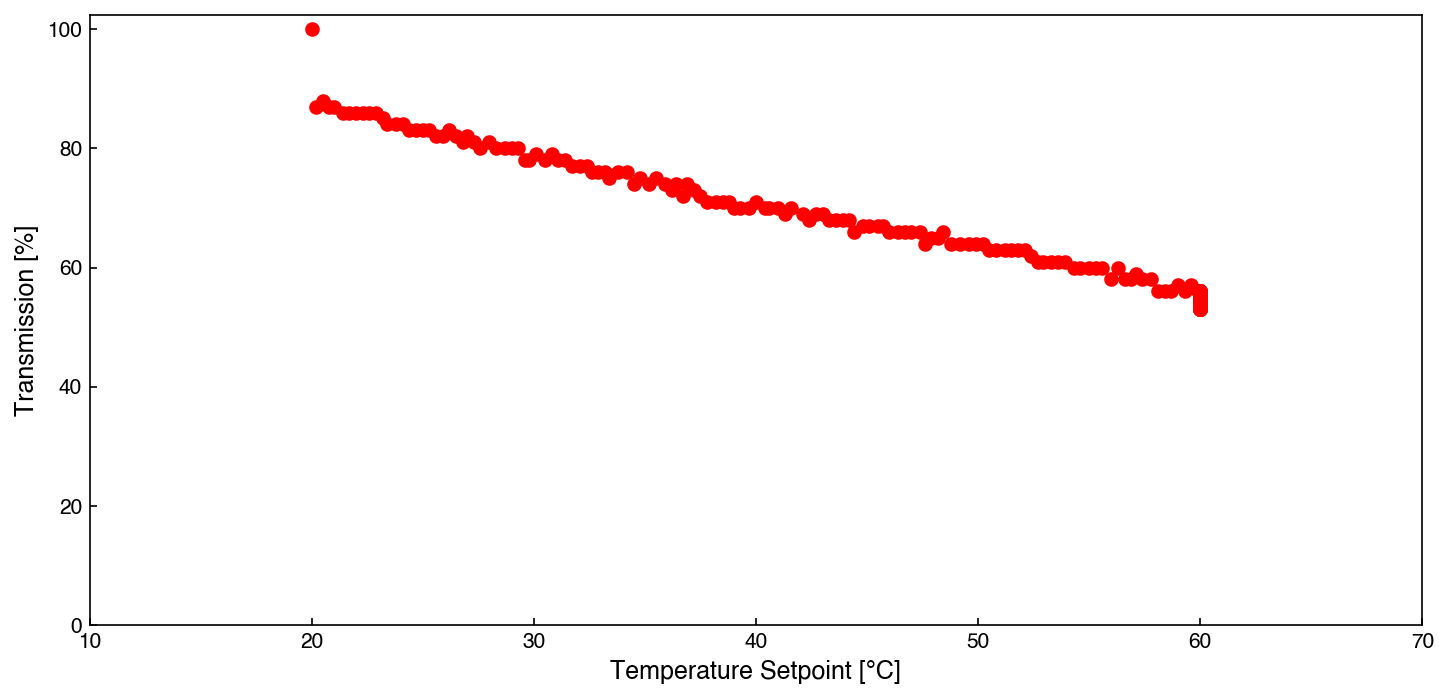

In [4]:
import pandas as pd

df = pd.read_csv("data/CC16.csv")

x_all = df['Temperature Setpoint [°C]'].values
y_all = df['Reactor3 Transmission [%]'].values

spacing = 30   
x_all = x_all[::spacing] # we ploted every 100 data points by using the spacing!
y_all = y_all[::spacing]

fig, ax = plt.subplots(figsize=(10, 5)) #create a new figure object (fig) with an associated axis object (ax)
plt.scatter(x_all,y_all,color='red',marker='o')
ax.set_xticks([10,20,30,40,50,60,70])
ax.set_yticks([0,20,40,60,80,100])
ax.set_xlabel('Temperature Setpoint [°C]')
ax.set_ylabel('Transmission [%]');

# Hold out:

In standard hold out, we would randomly select some subset (usually ~60-80%) for training and use the remaining data for testing. This can get tedious to code, but luckily scikit-learn has some tools to help us. 
Note the `np.random.seed(0)` line makes this cell run the same every time. If you remove it then it will give a different answer each time, or if you change the "seed" from 0 then you will get a different answer (but it will not change each time).

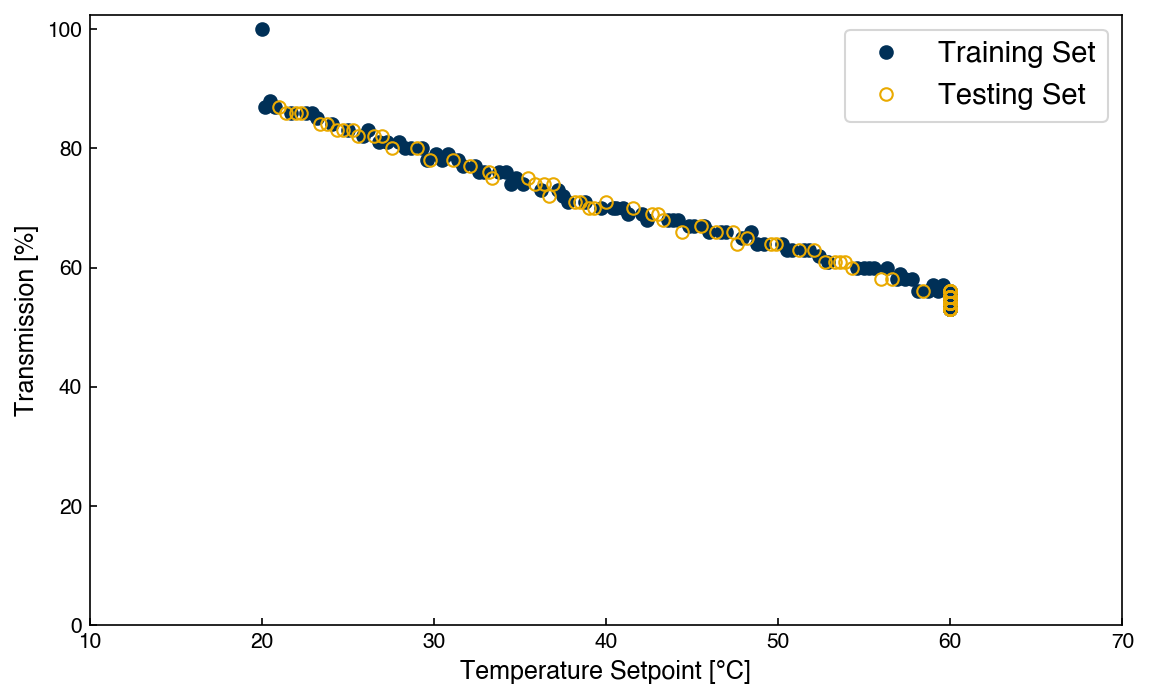

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.4)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_train, y_train, 'o')
ax.plot(x_test, y_test, 'o', markerfacecolor='none')
ax.set_xticks([10,20,30,40,50,60,70])
ax.set_yticks([0,20,40,60,80,100])
ax.set_xlabel('Temperature Setpoint [°C]')
ax.set_ylabel('Transmission [%]');
ax.legend(['Training Set', 'Testing Set'], fontsize=14);

Now, let's use the linear regression for our train & test date and compare the accuracy results:

r^2 training = 0.9831905187055587
r^2 testing = 0.9923355964861714


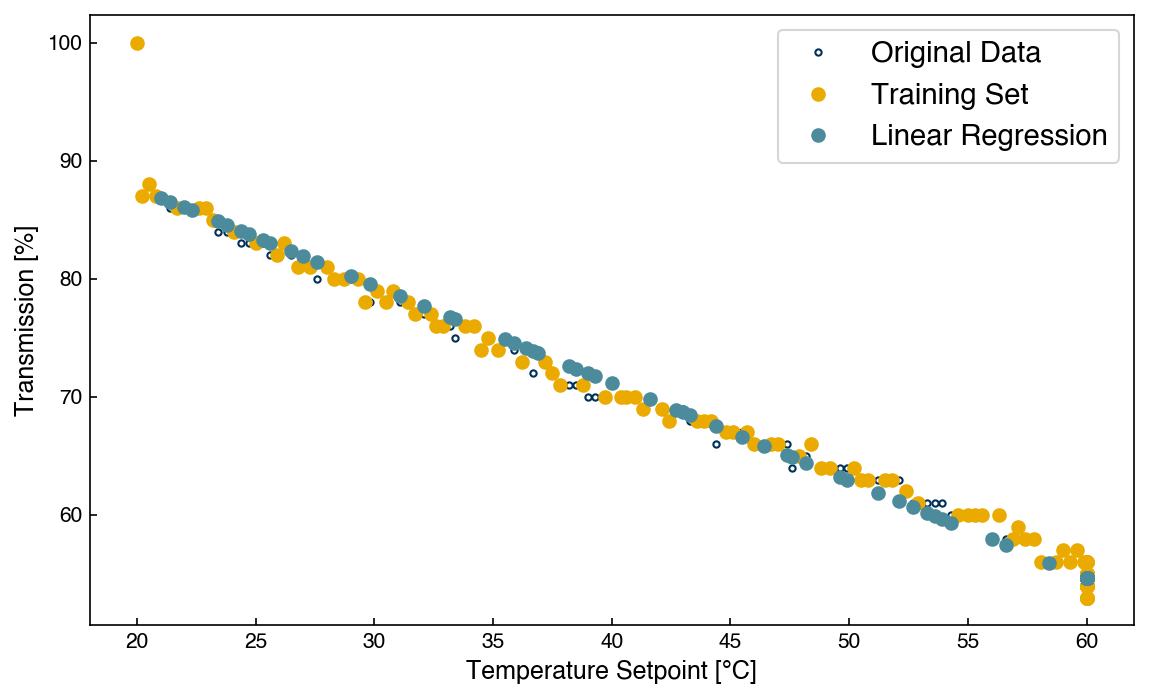

In [6]:
from sklearn.linear_model import LinearRegression

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

model = LinearRegression() #create a linear regression model instance
model.fit(x_train, y_train) #fit the model (equivalent to the linear solve)
r2 = model.score(x_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))


yhat_test = model.predict(x_test) #create the model prediction (equivalent to the matrix multiplication)
r2 = model.score(x_test, y_test)
print('r^2 testing = {}'.format(r2))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_all, y_all, '.', markerfacecolor='none')
ax.plot(x_train, y_train, 'o');
ax.plot(x_test, yhat_test, 'o')
ax.set_xlabel('Temperature Setpoint [°C]')
ax.set_ylabel('Transmission [%]');
ax.legend(['Original Data', 'Training Set', 'Linear Regression'], fontsize = (14))



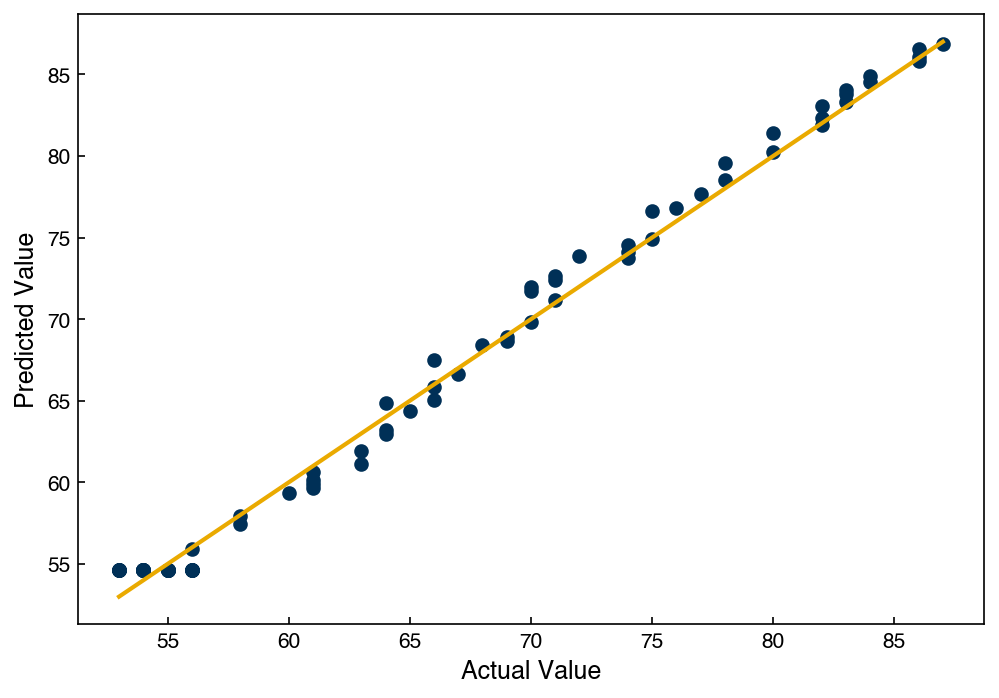

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(y_test, yhat_test, 'o')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value");

r^2 training = 0.9801566472225182
r^2 testing = 0.7680898737974221
r^2 training = 0.9871880661566514
r^2 testing = 0.8895762357521604
r^2 training = 0.9892199085088204
r^2 testing = 0.7952246161316416
r^2 training = 0.985572017405379
r^2 testing = -0.04324453146037044
r^2 training = 0.9857611569823697
r^2 testing = -2.716933205775357


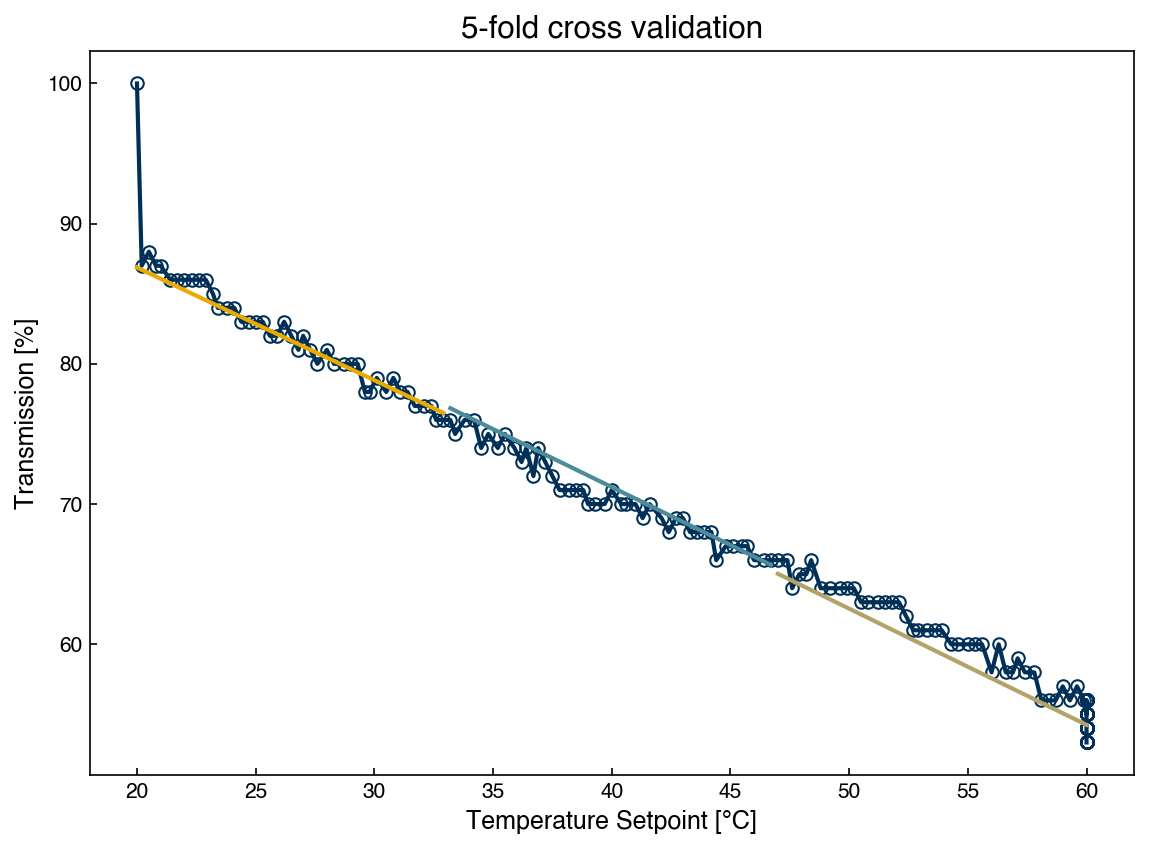

In [8]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)


fig, ax = plt.subplots()
ax.plot(x_all, y_all, '-o', markerfacecolor='none')

r2_test = []

for train_index, test_index in kf.split(x_all):
    x_train, x_test = x_all[train_index], x_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    
    model = LinearRegression() #create a linear regression model instance
    model.fit(x_train, y_train) #fit the model
    r2 = model.score(x_train, y_train) #get the "score", which is equivalent to r^2
    print('r^2 training = {}'.format(r2))

    yhat_predict = model.predict(x_test) #create the model prediction

    r2 = model.score(x_test, y_test) #get the "score", which is equivalent to r^2
    print('r^2 testing = {}'.format(r2))
    r2_test.append(r2)
    
    ax.plot(x_test, yhat_predict, '-')

ax.set_xlabel('Temperature Setpoint [°C]')
ax.set_ylabel('Transmission [%]');
ax.set_title('{}-fold cross validation'.format(str(kf.n_splits)));

When we use k-fold cross-validation we can see that the results depend a lot on exactly which test/train split we chose. In particular, if the end points are not included in the training set then the model tries to extrapolate and fails catastrophically. The advantage of k-fold cross-validation is it is harder to get lucky with your test/train split and accidentally find a split that makes your model look good. However, there is a tradeoff between number of splits and size of the split.

Now, let's take a look at the data file that you are working on that for the first question in your project. 
We can see that sometime when working with the datasets. there are different units involve. 
Let's take a look at the names of different features in this dataset.


In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Data on permeability.csv')
df.head(10)

,ID,SMILES,Tg,Melting,decomposition T,density (g/cc),cohesive energy density (Cal/cc),FFV,Tensile,Young,P_N2 (barrer),P_O2 (barrer),alpha_O/N
0,1,CC(C)(C)C1=CC(O[*])=C2C(=C1)C(C)(C)CC21CC(C)(C...,543,593,757,1.1,81.0,0.20,95.7,2973.16,5.300,30.60,5.773585
1,2,CC(C)(C)C1=C(O[*])C=C2C(=C1)C(C)(C)CC21CC(C)(C...,506,572,747,1.1,86.1,0.23,96.1,3317.75,4.300,17.30,4.023256
2,3,COC1=CC2=C(C(C)(C)CC23CC(C)(C4=CC(C5=CN(N=N5)C...,545,571,738,1.2,101.1,0.21,92.9,3514.17,5.700,22.30,3.912281
3,4,COC1=CC2=C(C=C1OC)C1(C3=CC([*])=CC=C23)C2=CC(C...,553,333,706,1.3,87.2,0.19,100.0,3542.72,12.200,46.40,3.803279
4,5,CC6(C)CC4(CC(C)(C)c3cc2oc1c(C#N)c([g])c([t])c(...,649,434,676,1.2,118.3,0.20,87.3,3635.83,344.700,1072.00,3.109951
5,6,[*]Nc3ccc2c1cc(OC)c(OC)cc1C8(c2c3)c6cc(Nc5ccc(...,536,400,630,1.2,94.4,0.17,58.0,3407.41,4.400,12.30,2.795455
6,7,COC1=CC2=C(C=C1OC)C1(C3=CC(N[*])=CC=C23)C2=CC(...,545,424,631,1.2,91.5,0.18,59.5,3688.69,3.600,10.80,3.000000
7,8,COC1=CC2=C(C=C1OC)C1(C3=CC(N[*])=CC=C23)C2=CC(...,543,354,587,1.2,94.2,0.17,108.3,3506.63,10.100,24.30,2.405941
8,9,COC1=CC2=C(C=C1OC)C1(C3=CC(N[*])=CC=C23)C2=CC(...,551,365,635,1.2,94.8,0.17,106.3,3443.45,7.700,20.20,2.623377
9,10,[*]c%11ccc(Oc%10ccc(NC(=O)c9ccc8c(=O)n(c7ccc(O...,564,695,852,1.4,165.0,0.23,77.8,2750.31,0.036,0.22,6.111111


In [10]:
x_names = [str(x) for x in df.columns[2:13]]
y_name = str(df.columns[-1])
print(y_name)
x_names


alpha_O/N


['Tg',
 'Melting',
 'decomposition T',
 'density (g/cc)',
 'cohesive energy density (Cal/cc)',
 'FFV',
 'Tensile',
 'Young',
 'P_N2 (barrer)',
 'P_O2 (barrer)',
 'alpha_O/N']

In [11]:
all_data = df[df.columns[2:]].values #drop the first columns


X = np.array(all_data[::], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[:,10], dtype='float')
y = y.reshape(-1,1)
print(X.shape, y.shape)

(78, 11) (78, 1)


## Scaling Features and Outputs

We can see that different features have very different ranges, and different units (e.g. degrees, percent, count).  Scaling data is like "non-dimensionalizing" or normalizing for different units. This is often critical to ensure that certain variables are not weighted more than others.

Statistical methods don't know about physical units, so we can normalize or "scale" features to aid in comparison:

* rescaling: 0 = min, 1 = max
* mean scaling: 0 = mean, 1 = max, -1 = min
* **standard scaling: 0 = mean, 1 = standard deviation**
* unit vector: the length of each multi-dimensional vector is 1

See the [scikit-learn documentation](http://scikit-learn.org/stable/modules/preprocessing.html) for more examples and discussion.

Note that scaling is not always a good idea. Sometimes the data have units that are already consistent, or re-scaling can remove some important aspects. Figuring out the best scaling scheme is often achieved through trial and error.

In [12]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)
print("Minimum: {}, Maximum: {}".format(X.min(), X.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_scaled.min(), X_scaled.max()))

Minimum: 9e-06, Maximum: 51188.7
Minimum scaled: -3.8696700120523233, Maximum scaled: 8.603020643839868


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #create a linear regression model instance
model.fit(X_scaled, y) #fit the model
r2 = model.score(X_scaled, y) #get the "score", which is equivalent to r^2

yhat = model.predict(X_scaled) #create the model prediction

print("r^2 = {}".format(r2))

r^2 = 1.0


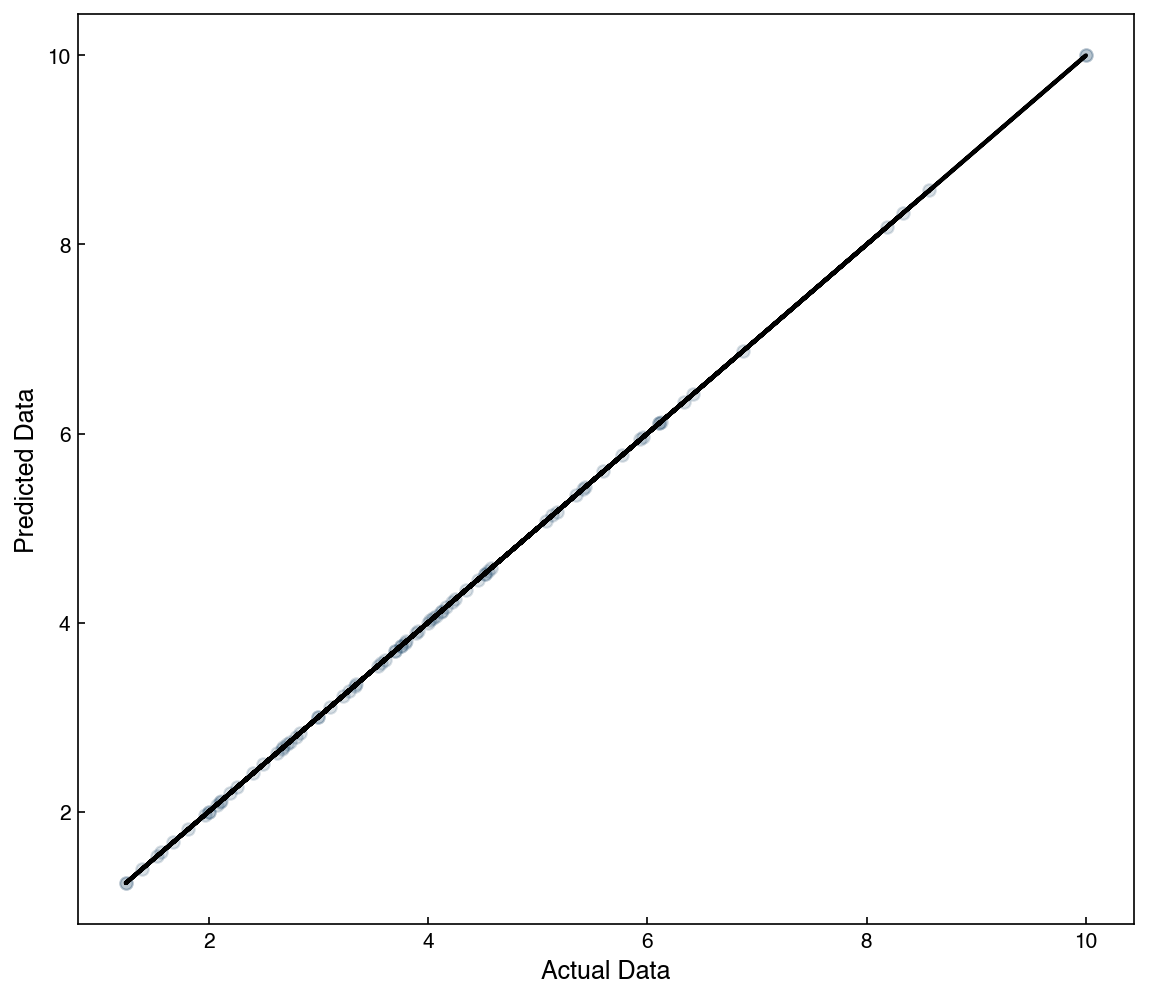

In [14]:
fig, ax = plt.subplots(figsize = (8, 7))

ax.scatter(y, yhat,alpha=0.15)
ax.plot(y,y, '-k')
ax.set_xlabel('Actual Data')
ax.set_ylabel('Predicted Data');

# Decision tree

Decision tree model is one of supervised non-parametric models in ML. We use this model to predict on the gas permeability data and we discuss the results by using the confusion matrix. 
Once again, we use the standard scaling but this time we will use the sklearn library. 

In [15]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
X_ss = ss.fit_transform(X)

y = y.astype(int)

As we saw earlier, we need to divide the dataset to data the we use for train and test and also a validation set. 
We will also use the k-fold cross validation.

In [16]:
##############training/testing split, cross-validation strategy
#Use training data to optimize model parameters, testing data for hyperparameter optimization, 
#and validation data to validate the model(output should be based on this set of data)

#Split all data into training/testing data and validation data 
from sklearn.model_selection import train_test_split
X_data,X_validation,y_data,y_validation = train_test_split(X,y,test_size=0.3,random_state=42)

#Split training/testing data using 5-fold cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)

Now it is time to import the decision tree classifier from sklearn library. There is a hyperparameter of depth and for getting the best results here, we ask the model to pick the best depth for our data between 2 to 20. Then we will ask the model to report back the best accuracy along with the best depth for the accuracy that we got. 

In [17]:
#Train a decision tree model
from sklearn.tree import DecisionTreeClassifier
depths = np.arange(2,20)

#Pre-assign a matrix to store accuracy scores for testing set 
accuracies = np.zeros((len(depths),5)) #5-fold cross-validation
idx1 = 0
for train_index,test_index in kf.split(X_data):
    X_train,X_test = X_data[train_index],X_data[test_index]
    y_train,y_test = y_data[train_index],y_data[test_index]
    X_train_ss = ss.fit_transform(X_train)
    for idx2,depth in enumerate(depths):
        dt = DecisionTreeClassifier(max_depth = depth)
        dt.fit(X_train_ss, y_train)
        X_test_ss = ss.transform(X_test)
        accuracies[idx2][idx1] = dt.score(X_test_ss,y_test)
    idx1 = idx1 + 1
# #print out a matrix of accuracy, columns: cross-validation #, rows: index of max_depth defined 
# print(accuracies)
#taking an average across 5 cross-validation trials to determine optimal max depth 
ave_accuracies = np.mean(accuracies,1)
# print(ave_accuracies)
opt_ave_accuracy = max(ave_accuracies)
opt_index = np.argmax(ave_accuracies)
opt_max_depth = depths[opt_index]
print("best model accuracy")
print(opt_ave_accuracy)
print("optimum depth for decision tree")
print(opt_max_depth)

best model accuracy
0.8909090909090909
optimum depth for decision tree
7


At the end, we can evaluate our results on the validation set and as you can see all the accuracy scores works great for the validation set. 

In [18]:
#Use validation set to test our model here 
df = DecisionTreeClassifier(max_depth = opt_max_depth)
X_data_ss = ss.fit_transform(X_data)
df.fit(X_data_ss,y_data)
X_validation_ss = ss.transform(X_validation)
validated_score = df.score(X_validation_ss,y_validation)
print("best r2 score on the validation set:")
print(validated_score)
yhat = df.predict(X_validation_ss)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
acc = accuracy_score(yhat,y_validation)
prec = precision_score(yhat,y_validation,average='weighted')
rec = precision_score(yhat,y_validation,average='weighted')
print('accuracy score on validation set: ')
print(acc)
print('precision score on validation set: ')
print(prec)
print('recall score on validation set: ')
print(rec)

best r2 score on the validation set:
0.9583333333333334
accuracy score on validation set: 
0.9583333333333334
precision score on validation set: 
0.9642857142857143
recall score on validation set: 
0.9642857142857143


Lets see how the model is doing on the test data. We will show the results by visualization using the confusion matrix. 

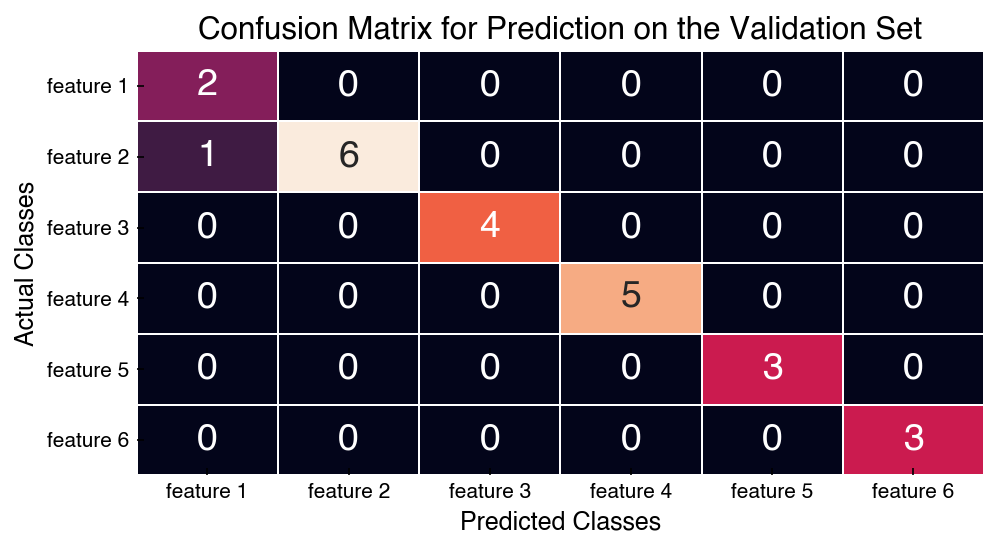

In [22]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_validation, yhat)

types = []
for datum in y_validation:
    if len(types) == 0:
        types.append(datum)
    sum = 0
    for typ in types:
        if typ == datum:
            sum += 1
    if sum == 0:
        types.append(datum)
    
num_classes = len(types)
fig, axs = plt.subplots(figsize=(7,4))

axs = sns.heatmap(cm, annot = True, cbar = False, linewidth = .5, ax = axs, fmt = 'd', annot_kws = {'va': 'center'}, xticklabels = ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6'], yticklabels = ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6'])
axs.set_xlabel('Predicted Classes')
axs.set_ylabel('Actual Classes')
axs.set_title('Confusion Matrix for Prediction on the Validation Set');

## Resources: 

- Data Analytics for Chemical Engineers- Prof. Medford,GT